In [50]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("initial_cleaned_winner_data.csv")

features = ['season','Driver Code','Team Code', 'Driver POS Standings',
            'Driver Champ Points', 'Team Champ Points']
X = data[features]
y = data["Winner"]

# convert target to binary classification
y_binary = (y == True).astype(int)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [52]:

#setting hyper parameters
param_grid = {'n_estimators': [100, 200],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [10, 20, None],
              'min_samples_split': [ 5, 10],
              'min_samples_leaf': [2, 4]}

rf = RandomForestClassifier(random_state=42)

#Find best hyperparameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=200,
                               cv=5, verbose=2, random_state=42, n_jobs=-1)


rf_random.fit(X_train, y_train)

#training model on best hyper parameters
best_params = rf_random.best_params_
model = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params)
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)
y_pred_binary = (y_pred1 > 0.5).astype(int)  # Convert predictions to binary


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 48 is smaller than n_iter=200. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Recall for True cases: 0.69
Accuracy:  0.9361353711790393


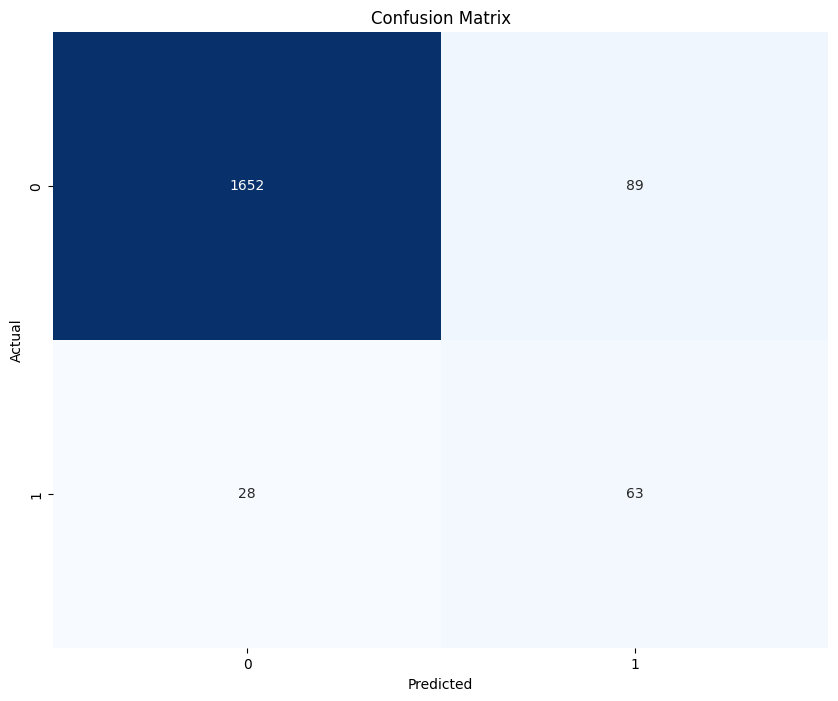

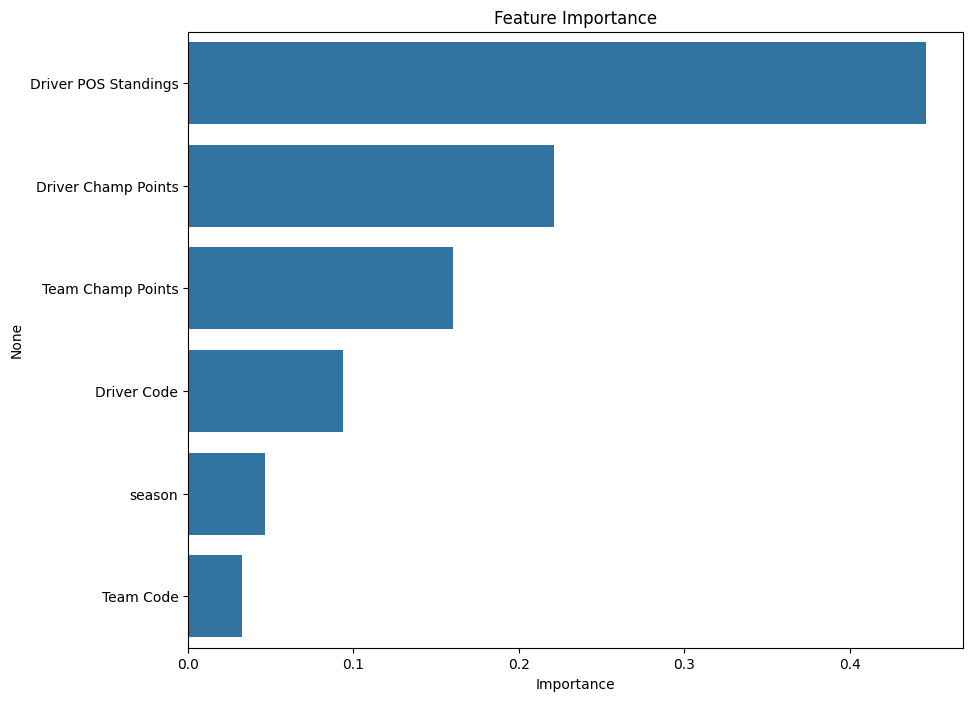

In [53]:


print("Best hyperparameters: ", best_params)

#Recall and Accuracy
recall = recall_score(y_test, y_pred_binary, pos_label=True)
print(f"Recall for True cases: {recall:.2f}")

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: ", accuracy)

#confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting feature importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()
